# Project: Wrangling and Analyze Data

In [86]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json

%matplotlib inline

## Data Gathering

1. Read the WeRateDogs Twitter archive data into a pandas dataframe

In [87]:
archive = pd.read_csv('C:/Users/Equan/Downloads/dogs-project/twitter-archive-enhanced.csv')

In [88]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [89]:
archive.shape

(2356, 17)

2. Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [90]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [91]:
predictions = pd.read_csv('image-predictions.tsv', sep= '\t')

In [92]:
# Look at the dataframe
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [93]:
predictions.shape

(2075, 12)

3. Using the Tweepy library to query additional data via the Twitter API

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


tweet_ids = archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [95]:
# Create an empty list which I will later append the data line by line
tweets = []

In [96]:
# Read data into the list line by line
for line in open('C:/Users/Equan/Downloads/dogs-project/tweet-json.txt', 'r'):
    tweets.append(json.loads(line))

In [97]:
# Load data into a DataFrame
tweets_df = pd.DataFrame.from_dict(tweets)
tweets_df = tweets_df[['id', 'retweet_count', 'favorite_count']]

In [98]:
# Check
tweets_df.sample(8)

,id,retweet_count,favorite_count
524,809084759137812480,4046,14685
1375,701601587219795968,523,2299
1527,690248561355657216,477,1845
1944,673705679337693185,439,1337
1023,746369468511756288,1854,6637
461,817502432452313088,3917,0
1840,675870721063669760,632,1783
2133,670061506722140161,373,822


In [99]:
tweets_df.shape

(2354, 3)

## Assessing Data

### Accessing Twitter Archived Enchanced Dataset

In [100]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [101]:
archive.shape

(2356, 17)

In [102]:
archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1213,715220193576927233,NaN,NaN,2016-03-30 16:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nico. His selfie game is strong af. Ex...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715220193...,10,10,Nico,None,None,None,None
1491,692894228850999298,NaN,NaN,2016-01-29 02:17:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Tupawc. He's actually a Christian rapper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692894228...,10,10,Tupawc,None,None,None,None
483,814986499976527872,NaN,NaN,2016-12-31 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. Someone attacked him with a sh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/814986499...,11,10,Cooper,None,None,pupper,None
2185,668986018524233728,NaN,NaN,2015-11-24 02:54:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ruby. She's a Bimmington Fettuccini. O...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668986018...,9,10,Ruby,None,None,None,None
861,763103485927849985,NaN,NaN,2016-08-09 20:03:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Belle. She's a Butterflop Hufflepoof. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/763103485...,10,10,Belle,None,None,None,None
1200,716730379797970944,NaN,NaN,2016-04-03 20:53:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",There has clearly been a mistake. Pup did noth...,NaN,NaN,NaN,https://twitter.com/chpsanfrancisco/status/716...,12,10,None,None,None,None,None
712,784431430411685888,NaN,NaN,2016-10-07 16:33:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stormy. He's curly af. Already pupared...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/784431430...,12,10,Stormy,None,None,None,None
157,861288531465048066,NaN,NaN,2017-05-07 18:36:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HI. MY. NAME. IS. BOOMER. AND. I. WANT. TO. SA...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/861288531...,13,10,None,None,None,None,None
983,749395845976588288,NaN,NaN,2016-07-03 00:14:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is George. He just remembered that bees a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749395845...,10,10,George,None,None,None,None
1217,714962719905021952,NaN,NaN,2016-03-29 23:49:30 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Just in case anyone's having a bad day. 12/10 ...,NaN,NaN,NaN,https://vine.co/v/inVtemLt9tE,12,10,None,None,None,None,None


In [103]:
# Create a function to check nulls and duplicates to avoid code repitition
def check(df):
    """Function to print the total number of null values for 
        each column and duplicates accross the whole dataset"""
    print(f"Total null values are \n{df.isnull().sum()}\n")
    print(f"Total duplicate values are {df.duplicated().sum()}")

In [104]:
# Check for null values
check(archive)

Total null values are 
tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

Total duplicate values are 0


In [105]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

From visual assesstment, this dataset is not tidy - `doggo`, `floofer`, `pupper` and `puppo` columns should be one but they are split into four different columns. I can also see through visual assessment, some unusual dog names like 'none', 'all', 'a' excetera

In [106]:
# Take a look at the name column
archive['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: name, Length: 2356, dtype: object

In [107]:
archive['name'].value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
River        1
Brownie      1
Mack         1
Trevith      1
Willy        1
Name: name, Length: 957, dtype: int64

Many dogs are named 'None' which is very strange. I should look at `text` associated with dogs named 'None'

In [108]:
with pd.option_context('display.max_colwidth', None):
    print(archive.query('name == "None"')['text'])

5       Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
7                           When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
12                                      Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm
24                                                        You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV
25               This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp
                                                                                       ...                                                       

These texts don't have the names of the dogs. Which suggests that those who submitted these dogs for ratings did not include the names of their pets. I would use regular expression to find names of dogs starting with lower case as this is an indication of an invalid name.

I would use regular expression to find names of dogs starting with lower case as this is an indication of an invalid name

In [109]:
# Find names that start with lower case using regex
archive[archive['name'].str.contains(r'^[^A-Z].*$')]['name'].value_counts()

a               55
the              8
an               7
very             5
quite            4
just             4
one              4
getting          2
not              2
actually         2
mad              2
space            1
his              1
old              1
infuriating      1
light            1
such             1
life             1
officially       1
my               1
by               1
unacceptable     1
incredibly       1
this             1
all              1
Name: name, dtype: int64

In [110]:
# Look at text associated with names starting with small letter
with pd.option_context('display.max_colwidth', None):
    print(archive[archive['name'].str.contains(r'^[^A-Z].*$')]['text'])

22                                    I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
56             Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
118                           RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…
169                   We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9
193     Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x
                                                                                       ...                                                       

Most of these texts start with "This is a..." or "This is an...".

I noticed whatever was used to extract the names of these dogs was programmed to catch the text after "This is" which resulted in the extraction of some articles like 'a', 'an', and 'the', adjectives and adverbs like 'very', 'quite' e.t.c as the dog names

#### Check for incorrect data types

In [111]:
archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

Inappropriate data types
- `timestamp` is of data type object
- `retweeted_status_timestamp` is of data type object

In [112]:
# Statistical summary of the numerical columns
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


I observe the following issues from this statistical summary
- Zero minimum values for `rating_numerator` and `rating_denominator`
- Absurdly high maximum values for `rating_numerator` (1776) and `rating_denominator` (170) which do not conform to the rating system

Check the mode for the `rating_denominator` column

In [113]:
archive['rating_denominator'].mode()

0    10
dtype: int64

The mode is 10, so I will look at the `text` for all rows not equal to 10

In [114]:
with pd.option_context('display.max_colwidth', None):
    print(archive.query('rating_denominator != 10')['text'])

313                                                                            @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
342                                                                                                                                      @docmisterio account started on 11/15/15
433                                                                           The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
784                                  RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
902                                                                                                Why does th

Some of the ratings are wrong and the reason might be because there are other fractions within the text that appeared before the actual rating and whatever was used to extract these ratings caught these other fractions instead and mistook them for the actual ratings.

Now let's look at the `rating_numerator` column

In [115]:
archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

The highest value counts are from the range of 5 to 14. 
I decided my lower boundary is 4 and my upper boundary is 17

In [116]:
with pd.option_context('display.max_colwidth', None):
    print(archive.query('rating_numerator > 17')['text'])

188                                                                                        @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
189                                         @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
290                                                                                                                                                            @markhoppus 182/10
313                                                                            @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
340                                  RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
433                                                                           The floofs have been released I 

Just like with the denominators, fractions that were not the ratings were extracted. 

But visually accessing the outlier numerators I found something interesting - most of the ratings were actually correct as there were no other fractions to extract from the text even if these ratings seemed to go against the rating systems. So I visited the `expanded_urls` column for help. `expanded_urls` column contains the link that takes you to each tweet so I visited these links to see why some ratings had such high numerators and denominators.

I found out that most of these tweets had multiple dogs, and because the conventional denominator is 10, the account could rate due to the number of dogs. For example, 6 dogs could be rated out of 60 and that made much sense.

##### Retweets

I visually accessed the data using Microsoft Excel.
I filtered out the blanks in the `retweeted_status_id` column and I noticed two other columns did not have null records in these filtered rows - `retweeted_status_user_id` and `retweeted_status_timestamp`.

<img src='images/Screenshot (120).png'>

Also, in these filtered columns, in the `text` columns for all these records, the text begins with an 'RT'


<img src='images/Screenshot (121).png'>

This suggests that these entries might be retweets

In [117]:
# Check retweets
archive[archive['retweeted_status_id'].isna() != True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [118]:
# Check the number of retweets
len(archive[archive['retweeted_status_id'].isna() != True])

181

##### Check for duplicates

I've checked the whole dataset for duplicate values and found none. Now I'll check individual columns I believe shouldn't have duplicates

In [119]:
# Check for duplicated tweet_id
archive['tweet_id'].duplicated().sum()

0

In [120]:
# Check for duplicate url
archive['expanded_urls'].duplicated().sum()

137

Duplicate urls exist and will be dropped

### Accessing the Image Predictions Dataset

In [121]:
predictions.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
723,686007916130873345,https://pbs.twimg.com/media/CYUwjz-UAAEcdi8.jpg,1,Rhodesian_ridgeback,0.885301,True,redbone,0.042335,True,seat_belt,0.010493,False
1651,809448704142938112,https://pbs.twimg.com/media/Czu9RiwVEAA_Okk.jpg,1,Greater_Swiss_Mountain_dog,0.375415,True,Cardigan,0.134317,True,English_springer,0.073697,True
425,674075285688614912,https://pbs.twimg.com/media/CVrL5YBWoAA_uPD.jpg,1,Airedale,0.305392,True,Kerry_blue_terrier,0.250014,True,Lakeland_terrier,0.188668,True
1479,780800785462489090,https://pbs.twimg.com/media/CtX2Kr9XYAAuxrM.jpg,2,Siberian_husky,0.951963,True,Eskimo_dog,0.035346,True,Pembroke,0.008862,True
1340,758740312047005698,https://pbs.twimg.com/media/CoeWSJcUIAAv3Bq.jpg,1,Chesapeake_Bay_retriever,0.848514,True,Labrador_retriever,0.110054,True,curly-coated_retriever,0.025201,True
2036,884441805382717440,https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg,1,Pembroke,0.993225,True,Cardigan,0.003216,True,Chihuahua,0.002081,True
1322,756526248105566208,https://pbs.twimg.com/media/Cn-4m2CXYAErPGe.jpg,1,geyser,0.991273,False,volcano,0.004673,False,fountain,0.001234,False
902,700029284593901568,https://pbs.twimg.com/media/CbcA673XIAAsytQ.jpg,1,West_Highland_white_terrier,0.726571,True,Maltese_dog,0.176828,True,Dandie_Dinmont,0.070134,True
454,674764817387900928,https://pbs.twimg.com/media/CV0_BSuWIAIvE9k.jpg,2,Samoyed,0.634695,True,Arctic_fox,0.309853,False,kuvasz,0.019641,True
1531,789599242079838210,https://pbs.twimg.com/media/CvU4UZpXgAE1pAV.jpg,2,Chesapeake_Bay_retriever,0.878822,True,beagle,0.018570,True,Labrador_retriever,0.017499,True


In [122]:
predictions.shape

(2075, 12)

In [123]:
# Check for null values and duplicates
check(predictions)

Total null values are 
tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

Total duplicate values are 0


No null values wow! My first encounter with a dataset without null values.

The dataset has no duplicate values accross the whole dataframe either

In [124]:
# Check data type issues
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


All the columns are of appropriate datatypes, except `tweet_id` which is supposed to be object

##### Check for duplicates

In [125]:
predictions['tweet_id'].duplicated().sum()

0

In [126]:
predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [127]:
# Check duplicate urls
predictions['jpg_url'].duplicated().sum()

66

In [128]:
predictions[predictions['jpg_url'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [129]:
# Check if there are any rows in which neither of the three predictions are False predictions
predictions.query('p1_dog == "False" & p2_dog == "False" & p3_dog == "False"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Accessing the Tweets json Dataset

In [130]:
tweets_df.sample(20)

,id,retweet_count,favorite_count
1519,690690673629138944,898,2547
845,766078092750233600,2970,0
2023,671882082306625538,1488,3693
2128,670093938074779648,365,1106
2138,670003130994700288,100,352
985,749036806121881602,896,3425
2222,668291999406125056,34,264
603,798585098161549313,6618,0
2192,668892474547511297,164,422
267,841439858740625411,4168,13755


In [131]:
tweets_df.shape

(2354, 3)

In [132]:
# Check for nulls and duplicates
check(tweets_df)

Total null values are 
id                0
retweet_count     0
favorite_count    0
dtype: int64

Total duplicate values are 0


No null values. No duplicate values

In [133]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


`id` should be of datat type object and the name of the column should be changed to `tweet_id`

In [134]:
# Statistical overview of the dataset
tweets_df.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


It is unusual to have zero values for `retweet_count` and `favorite_count`

In [135]:
tweets_df.query('retweet_count == 0')

,id,retweet_count,favorite_count
290,838085839343206401,0,150


Just one tweet (row of data). No retweet, 150 likes. This looks valid

In [136]:
tweets_df.query('favorite_count == 0')

,id,retweet_count,favorite_count
31,886054160059072513,108,0
35,885311592912609280,19297,0
67,879130579576475649,7181,0
72,878404777348136964,1349,0
73,878316110768087041,6965,0
...,...,...,...
1021,746521445350707200,1110,0
1041,743835915802583040,2387,0
1240,711998809858043904,138,0
2257,667550904950915073,37,0


I spend a lot of time on Twitter. It is in fact my favourite social media platform and I noticed it is unusual to see a tweet with more retweets than likes, let alone hundreds or thousands of retweets and no likes. 
I shall check these rows in the twitter_archive_enhanced dataset

In [137]:
zero_likes = tweets_df.query('favorite_count == 0')['id']

In [138]:
archive.query('tweet_id in @zero_likes')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


It looks like there are all retweets so these rows will be dropped

### Quality issues

##### Twitter Archive Enhanced Dataset
1. Inappropriate data type for `timestamp` and `tweet_id`. It should be datetime

2. 181 Retweets exist in the dataset

3. Invalid names of dogs. Some are named 'None' while others are named lower case words

4. Incorrect ratings of 75/10

5. Duplicate values in the `expanded_urls` column

##### Image Prediction Dataset

6. `jpg_url` column has duplicated values

7. `tweet_id` datatype should be object
##### Tweets json Dataset

8. `id` column should be named `tweet_id` and converted to object

### Tidiness issues
1. Because retweets are not part of my analysis, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`, are not needed. `in_reply_to_status`, `in_reply_to_user_id` are also not important to my analysis

2. In the Twitter Archive Enhanced dataset, the `doggo`, `floofer`, `pupper` and `puppo` columns should be one column

3. All three dataframes should be merged to form one master dataset

## Cleaning Data

In [139]:
# Make copies of original pieces of data
archive1 = archive.copy()
predictions1 = predictions.copy()
tweets_df1 = tweets_df.copy()

### Issue  #1

181 retweets exist in the dataset

#### Define

Drop retweets from the dataset

#### Code

In [140]:
# Drop rows which have values in the retweeted_status_id column
archive1 = archive1[archive1['retweeted_status_id'].isnull()]

#### Test

In [141]:
archive1.shape

(2175, 17)

### Issue #2
Inappropriate data type for `timestamp` and `tweet_id`columns.

#### Define
Convert datatypes of timestamp column from object to datetime, and tweet_id from integer to object

#### Code

In [142]:
archive1['timestamp'] = pd.to_datetime(archive1['timestamp'])
archive1['tweet_id'] = archive['tweet_id'].astype('object')

#### Test

In [143]:
archive1['timestamp']

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2351   2015-11-16 00:24:50+00:00
2352   2015-11-16 00:04:52+00:00
2353   2015-11-15 23:21:54+00:00
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2175, dtype: datetime64[ns, UTC]

In [144]:
archive1['tweet_id'].dtype

dtype('O')

### Issue #3:

Invalid dog names. Some dogs are named 'None' while some are named lower case words.

#### Define
Replace invalid names with Nan

In [145]:
# Replace dogs named None with Nan
archive1['name'].replace('None', np.nan, inplace=True)

In [146]:
# Replace lower case names with Nan
archive1.loc[archive1['name'].str.contains(r'^[^A-Z].*$', na=False), 'name'] = np.nan

#### Test

In [147]:
archive1['name'].value_counts()

Lucy         11
Charlie      11
Cooper       10
Oliver       10
Tucker        9
             ..
Shnuggles     1
Chesney       1
Kevon         1
Ridley        1
Willy         1
Name: name, Length: 930, dtype: int64

### Issue #4

Incorrect rating of 75/10

#### Define

Correct rating numerator from 75 to 9.75

#### Code

In [148]:
archive1['rating_numerator'].replace(to_replace=75, value=9.75, inplace=True)

#### Test

In [149]:
archive1.query('rating_numerator == 9.75')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None,None,None,None


### Issue #5

#### Define
Duplicate values in the `expanded_urls` column

#### Code

In [150]:
archive1.drop_duplicates('expanded_urls', inplace=True)

#### Test

In [151]:
archive1['expanded_urls'].duplicated().sum()

0

### Issue #6
jpg_url column has duplicated values

#### Define
Drop duplicate values in `jpg_url` column

#### Code

In [152]:
predictions1.drop_duplicates('jpg_url', inplace=True)

#### Test

In [153]:
predictions1['jpg_url'].duplicated().sum()

0

### Issue #7

`tweet_id` data type is integer instead of object
#### Define

Change tweet_id from integer to object

#### Code

In [154]:
predictions1['tweet_id'] = predictions1['tweet_id'].astype('object')

#### Test

In [155]:
predictions1['tweet_id'].dtype

dtype('O')

### Issue #8

`id` column should be renamed 'tweet_id' and converted to object data type

#### Define
Rename `id` column 'tweet_id' and change its data type from integer to object

#### Code

In [156]:
tweets_df1.rename(columns={'id':'tweet_id'}, inplace=True)

In [157]:
tweets_df1['tweet_id'] = tweets_df1['tweet_id'].astype('object')

#### Test

In [158]:
tweets_df1['tweet_id'].dtype

dtype('O')

### Issue #9
Because retweets are not part of my analysis, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`, are not needed. `in_reply_to_status`, `in_reply_to_user_id` are also not important to my analysis

#### Define
Drop retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status, in_reply_to_user_id columns

#### Code

In [159]:
archive1.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp',
                       'in_reply_to_status_id','in_reply_to_user_id'], inplace=True)

#### Test

In [160]:
archive1.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue #10

In the Twitter Archive Enhanced dataset, the `doggo`, `floofer`, `pupper` and `puppo` columns defy the rules of tidiness so should be one column instead of 4 different columns
#### Define
Melt the `doggo`, `floofer`, `pupper` and `puppo` columns into one column

#### Code

In [161]:
# Replace 'None' values with Nan
archive1['doggo'] = archive1['doggo'].replace('None', np.nan)
archive1['floofer'] = archive1['floofer'].replace('None', np.nan)
archive1['pupper'] = archive1['pupper'].replace('None', np.nan)
archive1['puppo'] = archive1['puppo'].replace('None', np.nan)

In [162]:
# Melt the four dog stages column into one, creating a new column named 'stage'
archive1 = archive1.melt(id_vars=['tweet_id', 'timestamp','source', 'text',
                   'expanded_urls', 'rating_numerator','rating_denominator', 'name'],
                   value_vars=['doggo','floofer','pupper','puppo'], var_name='stage', value_name='dog_stage')

In [163]:
# Move Nan stages down the dataframe
archive1.sort_values(by = 'dog_stage', inplace=True)

In [164]:
# Drop duplicates
archive1.drop_duplicates(subset = 'tweet_id', inplace=True)

In [165]:
# Drop 'stage' column
archive1.drop('stage', axis=1, inplace=True)

In [166]:
# Set dog_stage dataype to category
archive1['dog_stage'] = archive1['dog_stage'].astype('category')

#### Test

In [167]:
archive1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo
713,757393109802180609,2016-07-25 01:52:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo completely oblivious to the dou...,https://twitter.com/dog_rates/status/757393109...,10.0,10,NaN,doggo
700,758828659922702336,2016-07-29 00:57:05+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This doggo is just waiting for someone to be p...,https://twitter.com/dog_rates/status/758828659...,13.0,10,NaN,doggo
692,759793422261743616,2016-07-31 16:50:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12.0,10,Maggie,doggo
685,760521673607086080,2016-08-02 17:04:31+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Doggo want what doggo cannot have. Temptation ...,https://vine.co/v/5ApKetxzmTB,12.0,10,NaN,doggo


oops! It looks like I'll have to sort index

In [168]:
archive1 = archive1.sort_index()

### Issue #11
All three dataframes should be merged to form one master dataset

#### Define
Merge tweets_json dataframe with twitter archive enhanced dataframe and image predictions dataframe

#### Code

In [170]:
master = pd.merge(archive1, pd.merge(predictions1, tweets_df1, on='tweet_id', how='inner'))

#### Test

In [171]:
master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [172]:
master.to_csv('C:/Users/Equan/Downloads/dogs-project/twitter_archive_master.csv')

## Analyzing and Visualizing Data

### Insights:
1. What are the most popular dog names?

2. Which dog stage has the most likes on average?

3. What are the top predictions?

### What are the most popular dog names?

In [131]:
archive1['name'].value_counts()

Lucy         11
Charlie      11
Cooper       10
Oliver       10
Penny         9
             ..
Timofy        1
Skittle       1
Shnuggles     1
Aiden         1
Hercules      1
Name: name, Length: 930, dtype: int64

The most popular dog names are Lucy and Charlie, followed by Oliver and Cooper

### Which dog stages have the highest likes on average?

In [132]:
archive1.groupby('dog_stage')['favorite_count'].mean()

dog_stage
doggo      17691.880952
floofer    11064.444444
pupper      7214.819820
puppo      21622.565217
Name: favorite_count, dtype: float64

Puppo stage takes the lead with 21,000+ likes on average, followed by doggo stage dogs with about 17,000+ likes on average

### What are the top predictions?

From the image predictions dataset, I'm interested in knowing the top neural network precictions from the first algorithm (p1) only. What are the most popular True and most popular False predictions?

In [133]:
# Select observations with True p1 predictions
true_predictions = predictions.loc[predictions['p1_dog'] == True]
true_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [134]:
# Select observations with False p1 predictions
false_predictions = predictions.loc[predictions['p1_dog'] == False]
false_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [135]:
# Select top 10 True predictions
top_true_predictions = true_predictions['p1'].value_counts().nlargest(10)
top_true_predictions

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
chow                   44
Samoyed                43
toy_poodle             39
Pomeranian             38
malamute               30
Name: p1, dtype: int64

The most popular True prediction for p1 is Golden retriever, followed by Labrador retriever then Pembroke which are all dog breeds

In [136]:
# Select top 10 False predictions
top_false_predictions = false_predictions['p1'].value_counts().nlargest(10)
top_false_predictions

seat_belt      22
web_site       19
teddy          18
tennis_ball     9
dingo           9
doormat         8
hamster         7
tub             7
Siamese_cat     7
swing           7
Name: p1, dtype: int64

Neither of the False predictions are dog breeds

### Visualization

I'll create a bar chart to visualize the top True and top False predictions

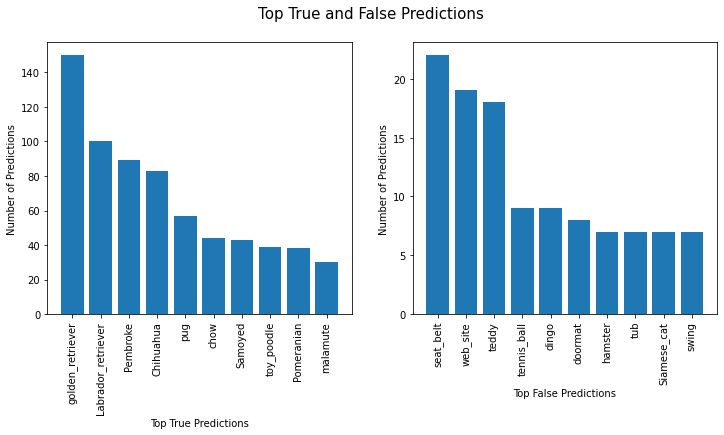

In [139]:
plt.figure(figsize=(12, 5))
plt.title('Top True and Top False Predictions')

plt.subplot(1,2,1)
plt.bar(top_true_predictions.index, top_true_predictions.values)
plt.xlabel('Top True Predictions')
plt.ylabel('Number of Predictions')
plt.xticks(rotation=90);

plt.subplot(1,2,2)
plt.bar(top_false_predictions.index, top_false_predictions.values)
plt.xlabel('Top False Predictions')
plt.ylabel('Number of Predictions')
plt.xticks(rotation=90)

plt.suptitle('Top True and False Predictions', size=15);